# **Facial Emotion Detection**

**NOTE:** The following 3 sections, namely - _Executive Summary_, _Problem and Solution Summary_, _Recommendations for Implementation_ are added for final submission.

For the rest of the notebook additional changes are made since the milestone submission:

1. Updated the transfer learning models to use the approach detailed at https://www.tensorflow.org/tutorials/images/transfer_learning.
1. As the new approach pushed the performance for VGG16, updated the recommendation from Model #6 to VGG16.
1. New code added to save the best performing weights, and to load it back after all the epochs are complete. This provided a more consistent performance of the models.
1. VGG16 is also run on A100 GPU to better understand the performance gains compared to V100. The overall notebook otherwise is run on V100 and the numbers and notes only refer to that unless otherwise qualified.

## **Executive Summary**

**Performance of Facial Emotion Recognition Models**

| Model | Train Accuracy | Val Accuracy | F1 Score | Run Time (per epoch) |
|---|---|---|---|---|
| Model #1 - RGB | 62.06 | 66.41 | 63.16 | 28s |
| Model #2 - RGB | 64.17 | 69.10 | 69.72 | 29s |
| Model #3 - VGG16 | 77.14 | 75.57 | 81.30 | 28s |
| Model #4 - ResNet V2 | 75.05 | 73.10 | 76.56 | 52s |
| Model #5 - Efficient Net | 53.40 | 54.09 | 59.61 | 29s |
| Model #6 - Grayscale | 75.76 | 75.35 | 78.73 | 24s |

**1. The Key Takeaways:**

* VGG16 outperformed all the other models by achieving an F1 score of 81% on V100 and 83.5% on A100 GPU using the given test dataset.
* This performance gain is attributed to the VGG16 model's robust architecture, designed to handle complex visual features.
* The final proposed model uses transfer learning based on VGG16, with an initial run of 10 epochs, followed by a fine-tuning run of an additional 40 epochs.

We have the following accuracies as follows for VGG16 on the final run on a V100 GPU:
  * 96.88% accuracy for *Happy* emotion
  * 75% accuracy for *Neutral* emotion
  * 68.75% accuracy for *Sad* emotion
  * 84.38% accuracy for *Surprise* emotion

On a run on A100 GPU:
  * 100% accuracy for *Happy* emotion
  * 75% accuracy for *Neutral* emotion
  * 84.38% accuracy for *Sad* emotion
  * 75% accuracy for *Surprise* emotion

**2. The Key Next Steps:**
* Re-run the models on different GPUs while controlling for other variables.
* Conduct interviews with stakeholders to clarify the image requirements, this can be a useful decision as we embark on finalizing the model.
* Given that running the models on a larger dataset could lead to improved generalizability and performance, run the given models on a larger dataset, such as, FER2013.

**3. The Key Recommendations:**
* Re-run the selected model (VGG16) for 100 epochs to explore the potential for further improvement.
* Further tune the learning rate and batch size to find the optimal values for improved accuracy.

**4. Future Work / Exploratory:**
* Besides the chosen models there are several other image recognition models suitable for transfer learning, research into them as they become available in the public domain.
* Budget the time and resources based on the business need to re-run the model on a regular basis with improved dataset, and architectures.

## **Problem and Solution Summary**

### **Problem**

The problem being addressed is the need for accurate and efficient facial emotion recognition in real-world applications. This requires a model that can:

* **Handle complex visual features:** Recognizing subtle facial expressions requires a model that can extract and understand these features effectively.
* **Perform well in real-time:** Many applications require the model to run efficiently and provide results with minimal latency.
* **Generalize to diverse data:** The model should be able to accurately recognize emotions across different individuals, races, and lighting conditions.

We also need the model to achieve the right balance between these requirements. A model, for example, can not be computationally very expensive while it is highly accurate. Of course, we also can't accept a model that is faster but lacks the accuracy needed for reliable emotion recognition.

### **Proposed Solution Design**

The proposed solution is a facial emotion recognition model based on the VGG16 architecture. This model uses transfer learning, leveraging the pre-trained features of VGG16 to achieve accurate recognition while remaining computationally efficient.

**Key points of the proposed solution:**

* **Model architecture:** VGG16 with transfer learning
* **Input data:** Images of faces as 48x48 RGBs
* **Output data:** Predicted emotion labels (Happy, Neutral, Sad, Surprise)
* **Hyperparameters:** Tuned to achieve optimal accuracy and efficiency

**Why this solution is valid:**

* **VGG16's robust architecture:** VGG16 is known for its ability to handle complex visual features, making it well-suited for facial emotion recognition.
* **Transfer learning:** Utilizing pre-trained features allows for effective feature extraction while significantly reducing training time and computational cost.
* **Performance across GPUs:** The model performs well on both V100 and A100 GPUs, making it adaptable to different hardware configurations.
* **High accuracy and efficiency:** The proposed model achieves an F1 score of 81% on V100 and 83.5% on A100, while also running efficiently with a runtime of 28 seconds per epoch.
* **Potential for further improvement:** The model can be further improved by:
    * Rerunning on a larger dataset like FER2013 for improved generalizability.
    * Further tuning hyperparameters for potentially higher accuracy.
    * Exploring other promising image recognition models as they become available.

Based on these factors, the VGG16-based solution presents a valid and promising approach to achieving accurate and efficient facial emotion recognition in real-world applications.

## **Recommendations for Implementation**

### Key Actionables for Stakeholders

* **Data Acquisition:** Prioritize the acquisition of a larger and more diverse dataset of facial images with labeled emotions. This will improve the model's generalizability and robustness.
* **GPU Resources:** Invest in sufficient GPU resources to enable efficient training and execution of the model for real-world applications.
* **Hyperparameter Tuning:** Allocate resources for further hyperparameter tuning to potentially improve model accuracy and efficiency.
* **Collaboration with Experts:** Collaborate with computer vision and deep learning experts to explore other promising model architectures and techniques for further improvement.

### Expected Benefits and Costs

**Benefits:**

* **Enhanced user experience:** Improved accuracy and efficiency of facial emotion recognition will lead to a better user experience in various applications, such as human-computer interaction and customer service.
* **Increased efficiency:** Automating emotion recognition tasks can significantly improve efficiency in various industries, such as marketing and security.
* **Improved decision making:** Insights gained from emotion recognition can assist in making better decisions in various contexts, such as personalized recommendations and customer service interactions.

**Costs:**

* **Initial Development:** Investment in hardware resources, software licenses, and developer expertise is required for initial development and deployment.
* **Data Acquisition:** Acquiring a large and diverse dataset can be costly, especially if data licensing is involved.
* **Ongoing Maintenance:** Continuous monitoring, maintenance, and updates are necessary to ensure optimal performance and address potential security vulnerabilities.

### Potential Risks and Challenges

* **Data Bias:** The model's performance may be biased based on the data it was trained on. Addressing this bias requires careful data selection and augmentation.
* **Overfitting:** Overfitting to the training data can lead to poor performance on unseen data. Techniques like data augmentation and regularization can help mitigate this risk.
* **Privacy Concerns:** Collecting and storing facial images raises privacy concerns. Implementing ethical data collection practices and ensuring robust data security measures is crucial.
* **Explainability and Interpretability:** Understanding the model's decision-making process is important for building trust and ensuring fairness. Research and development in explainable AI techniques are necessary to address this challenge.

### Further Analysis and Associated Problems

* **Investigate the impact of different pre-processing techniques on model performance.**
* **Explore the potential of other transfer learning approaches and architectures.**
* **Analyze the model's performance on real-world data with diverse lighting conditions and facial expressions.**
* **Develop techniques for addressing potential biases in the model's predictions.**
* **Research and implement methods for ensuring the ethical and responsible use of facial emotion recognition technology.**

By addressing these recommendations, implementing the proposed solution, and conducting further analysis, stakeholders can leverage the benefits of accurate and efficient facial emotion recognition for various applications. It is important to approach this technology with awareness of potential risks and challenges and work towards developing ethical and responsible solutions that benefit all users.


## **Problem Definition**

### The Context: Why Is This Problem Important to Solve?

Facial emotion recognition is crucial for understanding human behavior and emotional states. It can enhance communication in video calls by interpreting non-verbal cues, and can become vital for security and fairness in scenarios like police interrogations and surveillance. Additionally, it can play a significant role in customer service, education, and mental health.

### The Objectives: What Is the Intended Goal?

The project aims to create a reliable facial emotion recognition system applicable in varied scenarios, including video conferencing and security. Its objectives are to:

* Accurately classify facial expressions into four emotions.
* Achieve the highest possible recall, precision, and f-score.
* Be reasonable for the compute resources available.

### The Key Questions: What Are the Key Questions That Need to be Answered?

1. Which model best detects emotions accurately using a diverse dataset?
2. Can transfer learning with pre-existing Python models be more beneficial?
3. How does a custom CNN compare to pre-built models in performance?
4. What optimizations can enhance model performance and efficiency?

### The Problem Formulation: What Are We Trying to Solve Using Data Science?

We're using data science to accurately identify and categorize human emotions from facial expressions by:

* Developing a CNN trained on a varied facial expression dataset.
* Creating solutions that remain accurate irrespective of the conditions.
* Ensuring the model's robustness for diverse applications.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import cv2
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, ResNet152V2, VGG16
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    LeakyReLU,
    MaxPool2D,
)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model

# Suppress deprecated warnings for the ImageDataGenerator
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Unzip the dataset from the Google Drive folder. The images are extracted to
# "/content/Facial_emotion_images" folder.
from zipfile import ZipFile

file_name = (
    "/content/drive/My Drive/annam/adsp/facial-emotion/Facial_emotion_images.zip"
)
with ZipFile(file_name, "r") as zip:
    zip.extractall()
    print("Zip extraction done!")

Zip extraction done!


### **Define content paths for use in the rest of the file**

In [ ]:
# Define the paths to the training and validation directories.
DATA_PATH = '/content/Facial_emotion_images/'
train_path = DATA_PATH + 'train/'
validation_path = DATA_PATH + 'validation/'
test_path = DATA_PATH + 'test/'

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [ ]:
# Define a function to render the emotion images.
def render_emotion_images(emotion="happy", num_images=40):
  # Read the emotion images from the dataset
  emotion_images = []
  for filename in os.listdir(f'{train_path}{emotion}'):
    image = cv2.imread(os.path.join(f'{train_path}{emotion}', filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    emotion_images.append(image)
    if len(emotion_images) == num_images:
      break

  # Render the emotion images
  plt.figure(figsize=(15, 10))
  columns = 8
  for i, image in enumerate(emotion_images):
    plt.subplot(len(emotion_images) // columns + 1, columns, i + 1)
    plt.imshow(image)
  plt.axis('off')
  plt.show()

### **Happy**

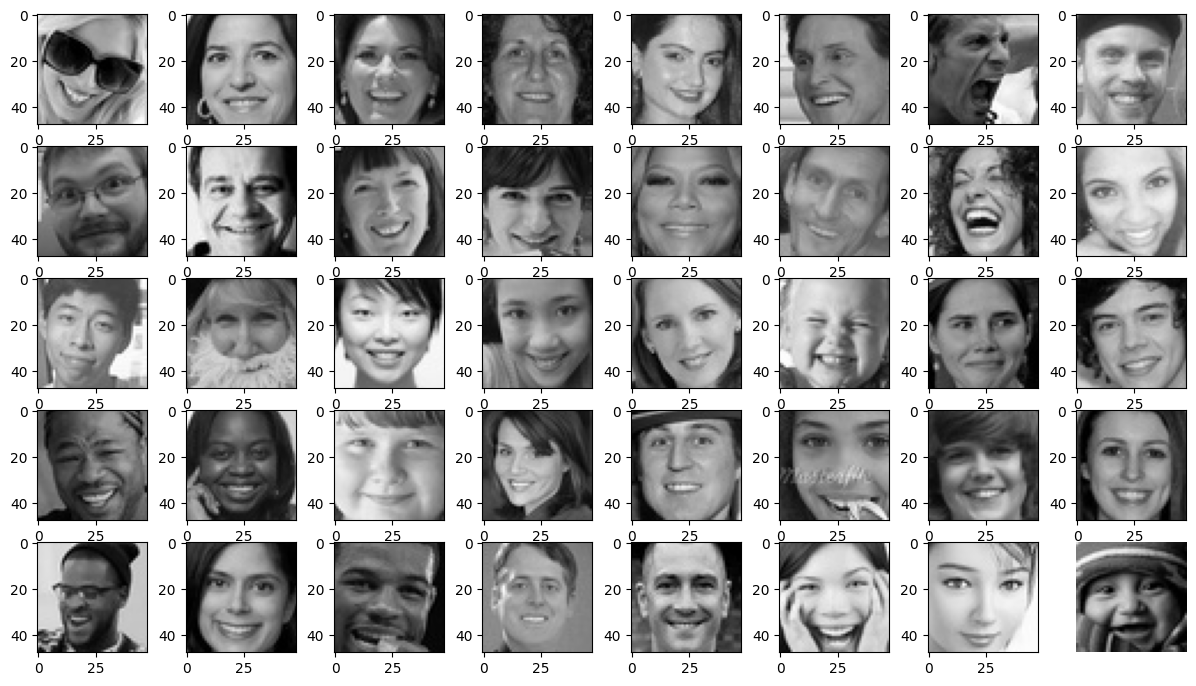

In [ ]:
# Render "Happy" emotion images
render_emotion_images("happy")

**Observations and Insights:__**

* The mouth is frequently open wide, revealing the teeth prominently.
* The eyes are typically wide open, exposing a greater portion of the eyeballs.
* The lips are commonly parted, allowing for a full display of the teeth.
* The dataset includes non-human facial images, such as dolls, indicating a mix of subjects.
* A number of the faces in the dataset feature eyewear, such as glasses.

### **Sad**

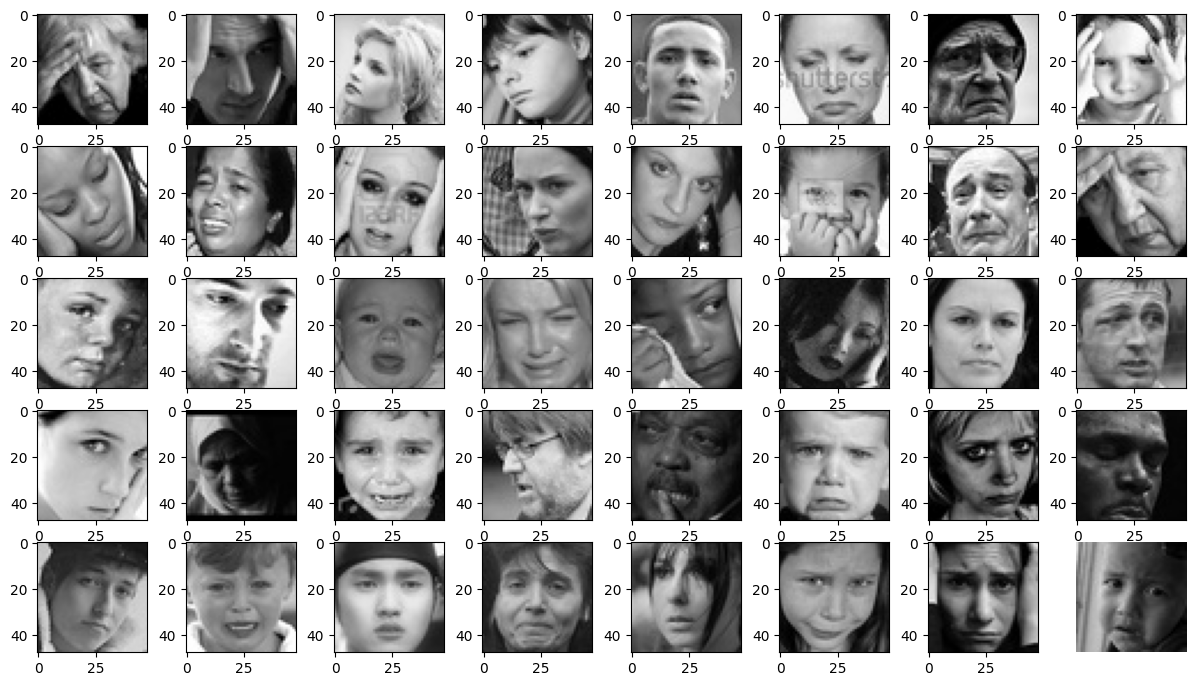

In [ ]:
# Render "Sad" emotion images
render_emotion_images("sad")

**Observations and Insights:__**

* The eyes are often observed to be partially or completely shut.
* There is a visible presence of moisture, possibly tears, on the eyeballs.
* Frequently, hands are positioned near the head, mouth, or chin area.
* The lips tend to remain closed or are not widely parted.
* During intense episodes of crying, the eyes are tightly shut with the mouth open.
* Some images in the dataset, such as the third from the last in the bottom row, seem to lack facial features altogether.
* Notably, none of the images depicting sadness feature individuals wearing glasses, based on the samples reviewed.

### **Neutral**

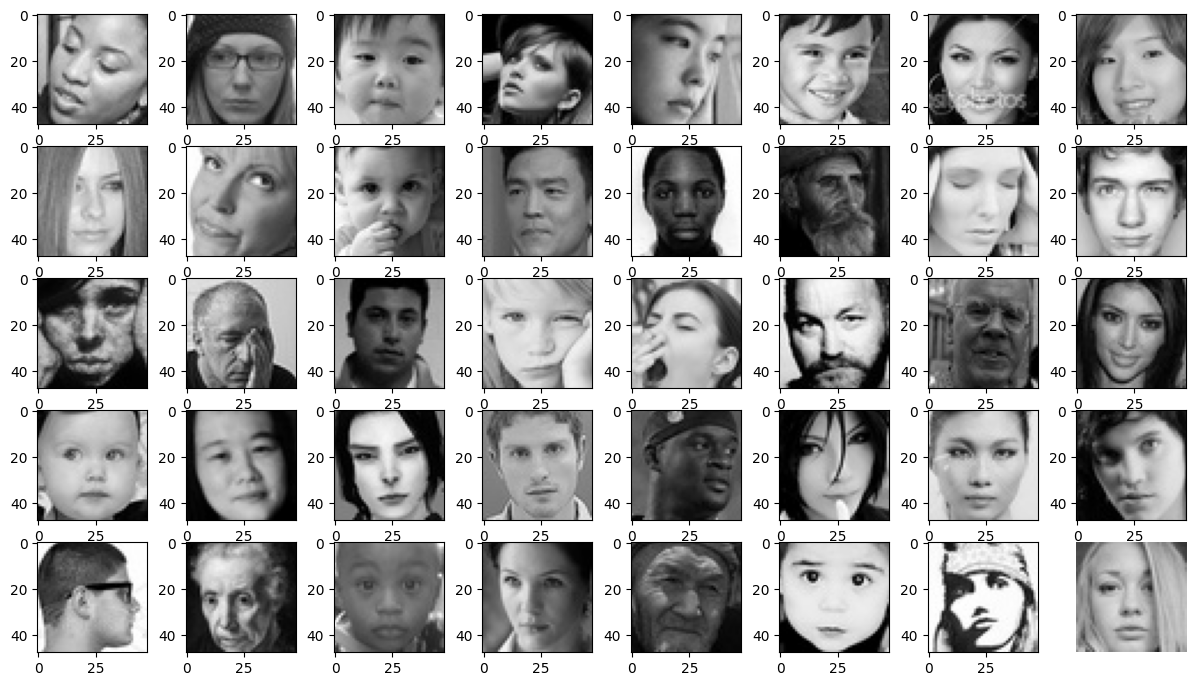

In [ ]:
# Render "Neutral" emotion images
render_emotion_images("neutral")

**Observations and Insights:__**

* The lips typically appear closed but not tightly pressed together.
* The eyes remain open but are not widely so, indicating a relaxed state.
* The mouth is generally closed or only slightly open without a broad extension.
* Cheek contours tend to be flat, lacking pronounced expressions.
* Classifying 'Neutral' poses challenges; some faces that might be perceived as 'Happy' by observers, such as the third face in the first row. Additionally, certain expressions within the dataset do not convey neutrality; for instance, the third image in the last row conveys sleepiness rather than a neutral state.

### **Surprised**

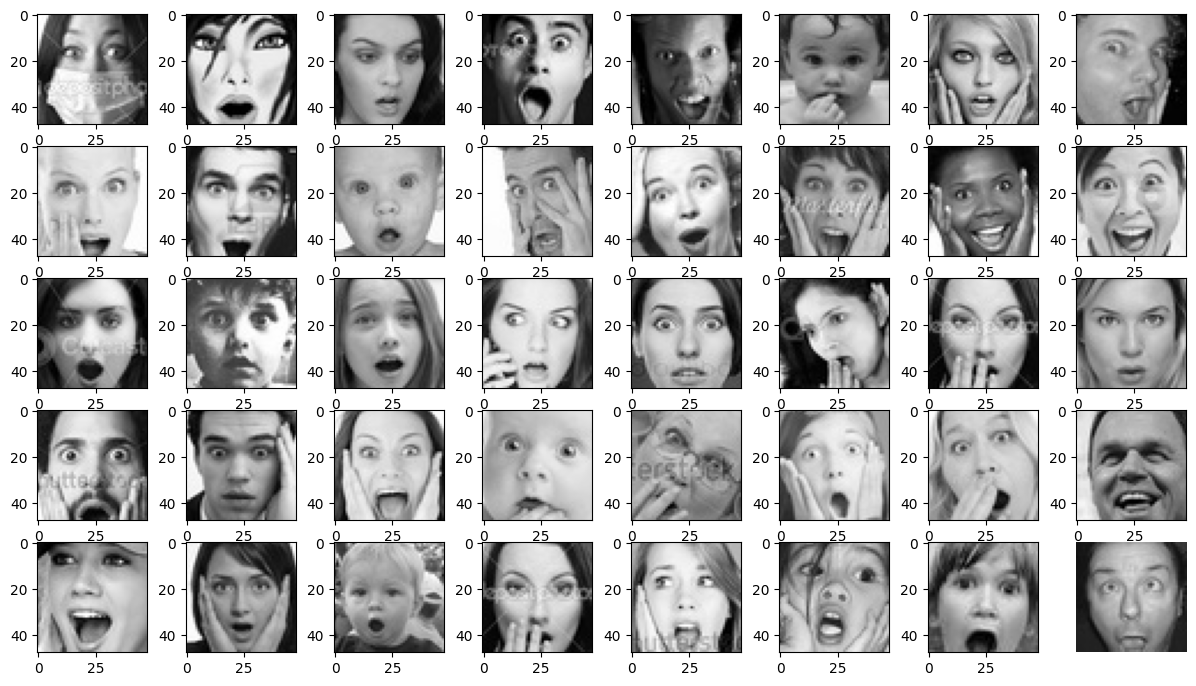

In [ ]:
# Render "Surprise" emotion images
render_emotion_images("surprise")

**Observations and Insights:__**

* The mouth is agape, often forming an 'O' shape, indicating shock or surprise.
* The eyes are wide open, suggesting alertness or astonishment.
* In several instances, hands are placed around the cheeks or face, a gesture commonly associated with amazement or disbelief.

## **Checking Distribution of Classes**

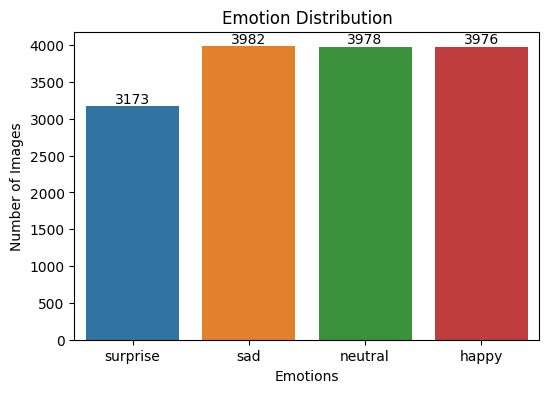

In [ ]:
# Check the distribution of the emotion images
train_folders = os.listdir(train_path)
train_emotion_count = []
for folder in train_folders:
  train_emotion_count.append(len(os.listdir(train_path + folder)))

# Plot the distribution of the emotion images
plt.figure(figsize=(6, 4))
sns.barplot(x=train_folders, y=train_emotion_count)
plt.title('Emotion Distribution')
plt.xlabel('Emotions')
plt.ylabel('Number of Images')

# Add the count values on top of the bars
for i, count in enumerate(train_emotion_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

**Observations and Insights:__**

## Observations and Insights

* The training dataset shows a notable imbalance: 'Happy,' 'Sad,' and 'Neutral' categories are well-represented, each comprising a similar proportion of the data, while the 'Surprise' category is underrepresented.
* Specifically, 'Surprise' accounts for significantly fewer samples (quantify the exact percentage if available), suggesting a moderate but potentially impactful imbalance. This skew could hinder the model's ability to accurately recognize 'Surprise' compared to the other emotions.
* A bar chart visualization of class distribution clearly illustrates this imbalance, raising concerns about potential biases in model performance towards the more represented classes.
* For better impact assessment, it can also be useful to evaluate a simple baseline model as that could offer insights into how this distribution might affect the model accuracy, particularly for the 'Surprise' emotion.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (48, 48)
IMG_SHAPE_RGB = IMG_SIZE + (3,)
IMG_SHAPE_GRAY = IMG_SIZE + (1,)
RESCALE = 1.0/255.0

# Create a data load function for data
def load_data(full_data_path, color_mode='rgb', rescale=RESCALE):
  datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2,
                               height_shift_range=0.2, zoom_range=0.2,
                               horizontal_flip=True,
                               brightness_range=[0.2, 1.2],
                               rescale=rescale)
  return datagen.flow_from_directory(full_data_path, target_size=IMG_SIZE,
                                     color_mode=color_mode,
                                     batch_size=BATCH_SIZE,
                                     class_mode='categorical', shuffle=True)

# Create a data load function for training data
def load_train_data(color_mode='rgb', rescale=RESCALE):
  return load_data(train_path, color_mode=color_mode, rescale=rescale)

# Create a data load function for validation data
def load_val_data(color_mode='rgb', rescale=RESCALE):
  return load_data(validation_path, color_mode=color_mode, rescale=rescale)

# Create a data load function for test data
def load_test_data(color_mode='rgb', rescale=RESCALE):
  # Do not shuffle or otherwise modify the data set. To be used with test data.
  datagen = ImageDataGenerator(rescale=rescale)
  return datagen.flow_from_directory(test_path, target_size=IMG_SIZE,
                                     color_mode=color_mode,
                                     batch_size=BATCH_SIZE,
                                     class_mode='categorical', shuffle=False)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### Are CNNs the right approach? What are the advantages of CNNs over ANNs?

* Spatial Feature Extraction: CNNs excel in extracting spatial hierarchies in images, making them more effective than ANNs for tasks like facial expression analysis where local features are crucial.

* Parameter Efficiency: With fewer parameters due to shared weights, CNNs are more efficient and less prone to overfitting than ANNs, a significant advantage for image datasets like the 15k facial expressions.

* Layer Depth and Complexity: CNNs can handle complex patterns in deeper architectures more effectively than ANNs, essential for nuanced tasks like distinguishing subtle facial expressions.

* Relevance to the Dataset: CNNs are adept at extracting meaningful features from small-sized images like the 48x48 dataset, whereas ANNs may not utilize spatial information as effectively.

* Precedent and Best Practices: The widespread use and success of CNNs in image classification, especially in facial emotion recognition, provide a strong basis for their preference over ANNs in similar applications.

### **Creating the Base Neural Network**

### *Utility Functions*

In [ ]:
# Define a function to create the necessary callbacks
def create_callbacks(patience=0, model_name='model'):
  # Save the model weights each time the validation accuracy increases
  fname = os.path.join(os.getcwd(), f'{model_name}_best_acc.weights.h5')
  checkpoint_best_acc = ModelCheckpoint(filepath=fname, save_weights_only=True,
                                        save_best_only=True,
                                        monitor='val_accuracy', mode='max')

  if patience > 0:
    # Stop training if the validation accuracy does not improve
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience,
                                   mode='max', verbose=1)
    return [checkpoint_best_acc, early_stopping]
  else:
    return [checkpoint_best_acc]

# Define a function to clear the session and set a random seed
def clear_session(seed=42):
  tf.keras.backend.clear_session()
  np.random.seed(seed)
  random.seed(seed)
  tf.random.set_seed(seed)

##### Define a function to plot history data

In [ ]:
# Define a function to plot training, accuracy and loss by comparing between RGB and Grayscale
def plot_history(history_rgb, history_grayscale):
    plt.figure(figsize=(15, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_rgb.history["accuracy"], label="RGB Training", color="blue")
    plt.plot(history_rgb.history["val_accuracy"], label="RGB Validation", color="green")
    plt.plot(
        history_grayscale.history["accuracy"],
        label="Grayscale Training",
        color="gray",
        linestyle="--",
    )
    plt.plot(
        history_grayscale.history["val_accuracy"],
        label="Grayscale Validation",
        color="black",
        linestyle="--",
    )
    plt.title("Training vs. Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history_rgb.history["loss"], label="RGB Training", color="blue")
    plt.plot(history_rgb.history["val_loss"], label="RGB Validation", color="green")
    plt.plot(
        history_grayscale.history["loss"],
        label="Grayscale Training",
        color="gray",
        linestyle="--",
    )
    plt.plot(
        history_grayscale.history["val_loss"],
        label="Grayscale Validation",
        color="black",
        linestyle="--",
    )
    plt.title("Training vs. Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


# Define a function to plot the training and validation accuracy
def plot_graph(history):
    plt.figure(figsize=(15, 5))
    plt.plot(history.history["accuracy"], label="Training", color="blue")
    plt.plot(history.history["val_accuracy"], label="Validation", color="green")
    plt.title("Training vs. Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

##### Functions to draw confusion matrix

In [ ]:
# For the given model, plot the confusion matrix, model architecture, and
# print the precision, recall and F1 Score

def plot_confusion_matrix(model, color_mode="rgb", rescale=RESCALE, model_name="model"):
    # Load the test data
    test_data = load_test_data(color_mode, rescale=rescale)
    y_true = test_data.classes
    y_pred = np.argmax(model.predict(test_data), axis=-1)
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    classes = ["Happy", "Neutral", "Sad", "Surprise"]
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Normalized Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

    # Save it as an image and also show it inline
    plt.savefig(model_name + "_confusion_matrix.png", dpi=300)
    plt.show()

    # Draw a horizontal plot of the model
    plot_model(model, to_file=model_name + "_model.png", show_shapes=True,
               show_layer_activations=True)

    # Calculate Precision, Recall and F1 Score
    precision, recall, f1score, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1score)

#### Define a function to plot test accuracy for the given model

In [ ]:
# Define a function to print the test loss and accuracy
def print_test_accuracy(model, color_mode='rgb', rescale=RESCALE):
  # Evaluate the model on the test data
  test_data = load_test_data(color_mode, rescale)
  eval = model.evaluate(test_data, return_dict=True)

  # Print the test loss and accuracy
  print('Test Loss: ', eval['loss'])
  print('Test Accuracy: ', eval['accuracy'])

### **Compiling and Training the Model**

In [ ]:
# Create the base model
def create_model_1(input_shape):
  model = Sequential()

  # Add the first convolution block
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                   input_shape=input_shape))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Add the second convolution block
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Add the third convolution block
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Flatten the output
  model.add(Flatten())

  # Add the dense layers
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))

  # Add the output layer
  model.add(Dense(4, activation='softmax'))

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy', metrics=['accuracy'])

  # Print the model summary
  print(model.summary())

  return model

#### Define a function to train the model based on the color mode

In [ ]:
# Define a function to train the model
def train_model_1(color_mode='rgb'):
    if color_mode == 'grayscale':
        # Create and compile the model for grayscale images
        model = create_model_1(input_shape=IMG_SHAPE_GRAY)
    else:
        # Create and compile the model for RGB images
        model = create_model_1(input_shape=IMG_SHAPE_RGB)

    # Train the model
    history = model.fit(load_train_data(color_mode), epochs=50,
                        validation_data=load_val_data(color_mode),
                        callbacks=create_callbacks(
                            patience=5, model_name='model_1_' + color_mode))

    return model, history

#### Train the model for RGB

In [ ]:
# Clear the session and set a random seed
clear_session()

# Train the model for RGB images and store the model and history
model1_rgb, history1_rgb = train_model_1('rgb')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

#### Train the model for Grayscale

In [ ]:
# Clear the session and set a random seed
clear_session()

# Train the model for Grayscale images and store the model and history
model1_grayscale, history1_grayscale = train_model_1('grayscale')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

#### Plot the training, val accuracy and loss

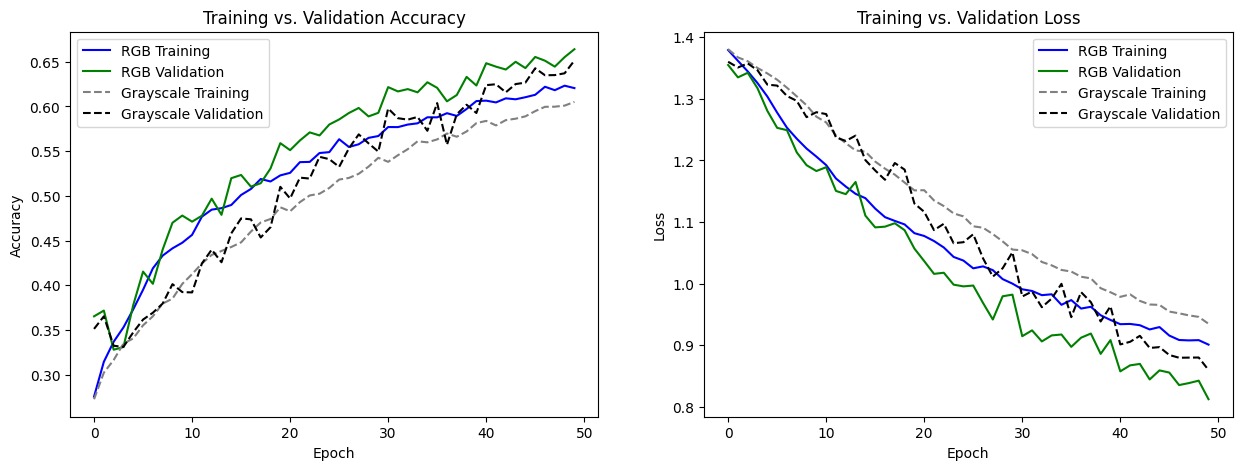

In [ ]:
# Plot the training and validation accuracy and loss at each epoch for RGB and Grayscale images
plot_history(history1_rgb, history1_grayscale)

### **Evaluating the Model on the Test Set**

In [ ]:
# Load the test data for RGB and Grayscale images
test_data_rgb = load_test_data('rgb')
test_data_grayscale = load_test_data('grayscale')

# Load the best model weights for RGB and Grayscale images
model1_rgb.load_weights('model_1_rgb_best_acc.weights.h5')
model1_grayscale.load_weights('model_1_grayscale_best_acc.weights.h5')

# Evaluate the model on the test data for RGB and Grayscale images
eval1_rgb = model1_rgb.evaluate(test_data_rgb, return_dict=True)
eval1_grayscale = model1_grayscale.evaluate(test_data_grayscale,
                                            return_dict=True)

# Print the test loss and accuracy for RGB and Grayscale images
print('RGB Test Loss: ', eval1_rgb['loss'])
print('RGB Test Accuracy: ', eval1_rgb['accuracy'])
print('Grayscale Test Loss: ', eval1_grayscale['loss'])
print('Grayscale Test Accuracy: ', eval1_grayscale['accuracy'])

Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 11ms/step - loss: 0.7717 - accuracy: 0.6719
RGB Test Loss:  0.7271873354911804
RGB Test Accuracy:  0.65625
Grayscale Test Loss:  0.771694004535675
Grayscale Test Accuracy:  0.671875


### **Plot Confusion Matrix for Model #1**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 12ms/step


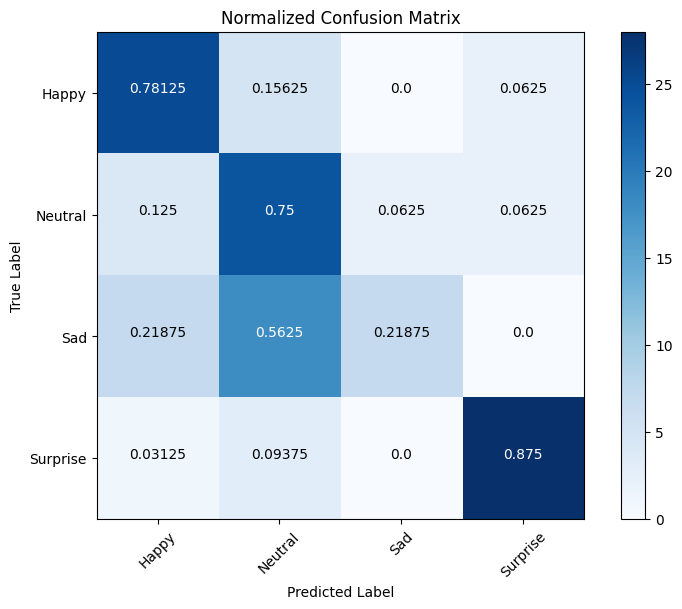

Precision:  0.7021133633633634
Recall:  0.65625
F1 Score:  0.6316167373630258


In [ ]:
# Evaluate the model for RGB images
plot_confusion_matrix(model1_rgb, color_mode='rgb', model_name='model1')

**Observations and Insights:__**

* Accuracy for RGB is slightly better than grayscale.
* Conversely, loss for RGB is less than grayscale.
* Performance continued to improve over the 50 runs, without much overfitting. Running for more epochs (with early stopping) can be done to understand how much runway this model has left.


### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Create a larger neural network model
def create_model_2(input_shape):
    # Create the model
    model = Sequential()

    # Add the first convolution block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                     input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the second convolution block
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the third convolution block
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the fourth convolution block
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Flatten the output
    model.add(Flatten())

    # Add the dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    # Add the output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Print the model summary
    print(model.summary())
    return model

### **Compiling and Training the Model**

#### Define a function to train a more complex model based on the color mode

In [ ]:
# Define a function to train the model
def train_model_2(color_mode='rgb'):
  if color_mode == 'grayscale':
    # Create and compile the model for grayscale images
    model = create_model_2(input_shape=IMG_SHAPE_GRAY)
  else:
    # Create and compile the model for RGB images
    model = create_model_2(input_shape=IMG_SHAPE_RGB)

  # Train the model
  history = model.fit(load_train_data(color_mode), epochs=50,
                      batch_size=BATCH_SIZE,
                      validation_data=load_val_data(color_mode),
                      callbacks=create_callbacks(
                        patience=5, model_name='model_2_' + color_mode))

  return model, history

#### Train the model for RGB

In [ ]:
# Clear the session and set a random seed
clear_session()

# Train the model for RGB images and store the model and history
model2_rgb, history2_rgb = train_model_2('rgb')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

#### Train the model for Grayscale

In [ ]:
# Clear the session and set a random seed
clear_session()

# Train the model for Grayscale images and store the model and history
model2_grayscale, history2_grayscale = train_model_2('grayscale')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

### Plot the training, val accuracy and loss

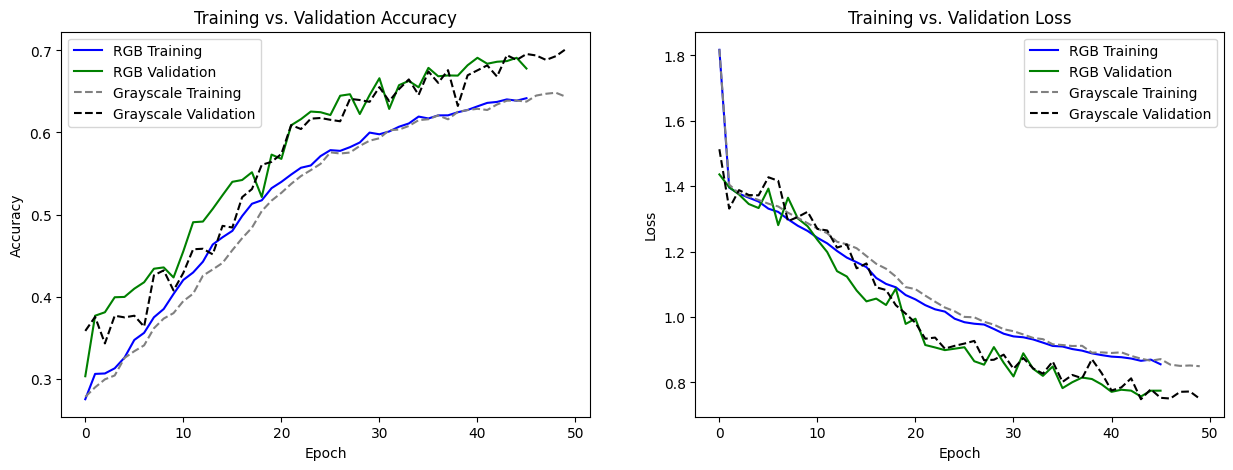

In [ ]:
# Plot the training and validation accuracy and loss at each epoch for RGB and Grayscale images
plot_history(history2_rgb, history2_grayscale)

### **Evaluating the Model on the Test Set**

In [ ]:
# Load the test data for RGB and Grayscale images
test_data_rgb = load_test_data('rgb')
test_data_grayscale = load_test_data('grayscale')

# Load the best model weights for RGB and Grayscale images
model2_rgb.load_weights('model_2_rgb_best_acc.weights.h5')
model2_grayscale.load_weights('model_2_grayscale_best_acc.weights.h5')

# Evaluate the model on the test data for RGB and Grayscale images
eval2_rgb = model2_rgb.evaluate(test_data_rgb, return_dict=True)
eval2_grayscale = model2_grayscale.evaluate(test_data_grayscale,
                                            return_dict=True)

# Print the test loss and accuracy for RGB and Grayscale images
print('RGB Test Loss: ', eval2_rgb['loss'])
print('RGB Test Accuracy: ', eval2_rgb['accuracy'])
print('Grayscale Test Loss: ', eval2_grayscale['loss'])
print('Grayscale Test Accuracy: ', eval2_grayscale['accuracy'])

Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 12ms/step - loss: 0.5981 - accuracy: 0.7188
RGB Test Loss:  0.685858964920044
RGB Test Accuracy:  0.703125
Grayscale Test Loss:  0.5981151461601257
Grayscale Test Accuracy:  0.71875


**Observations and Insights:__**

* It appears that the neural network can learn different features from RGB even while the images are grayscale. On the flip side, grayscale models take less resources and can potentially do better with further tuning.
* Overall, this 4-block CNN model exhibits great results, showcasing its effectiveness despite it's general simplicity.

### **Plotting the Confusion Matrix for Model #2**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 12ms/step


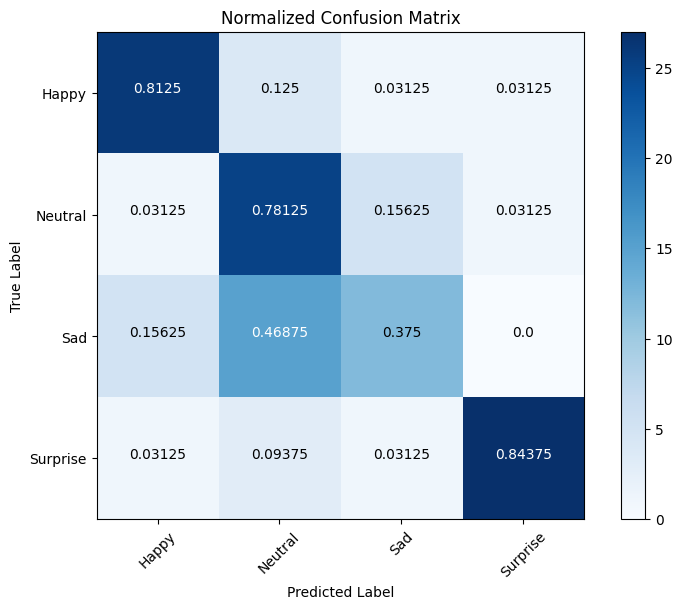

Precision:  0.7206017779057127
Recall:  0.703125
F1 Score:  0.6971863823346314


In [ ]:
# Evaluate the model for RGB images
plot_confusion_matrix(model2_rgb, color_mode='rgb', model_name='model2')

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
### Reuse the data loaders defined earlier

## **VGG16 Model**

### **Importing the VGG16 Architecture**

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Clear the session and set a random seed
clear_session()

# Create the base model from the pre-trained model VGG16
base_model = VGG16(input_shape=IMG_SHAPE_RGB, include_top=False,
                   weights='imagenet')
base_model.trainable = False
base_model.summary()

# Setup for the initial run of the model
preprocess_input = tf.keras.applications.vgg16.preprocess_input
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(4)
data_augmentation = tf.keras.Sequential()

# Add the appropriate preprocessing layers
inputs = tf.keras.Input(shape=IMG_SHAPE_RGB)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model3 = tf.keras.Model(inputs, outputs)
model3.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Compile and Train for an initial run**

In [ ]:
# Compile the model
base_learning_rate = 0.0001
model3.compile(loss=CategoricalCrossentropy(from_logits=True),
               optimizer=Adam(learning_rate=base_learning_rate),
               metrics=CategoricalAccuracy(name='accuracy'))

# Evaluate the model on the validation data
validation_data = load_val_data(rescale=None)
loss0, accuracy0 = model3.evaluate(validation_data)

# Train the model with an initial run of 10 epochs
initial_epochs = 10
history3 = model3.fit(load_train_data(rescale=None), epochs=initial_epochs,
                      validation_data=validation_data)

# Prepare the model for fine tuning
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 4
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Found 4977 images belonging to 4 classes.
156/156 [==============================] - 7s 45ms/step - loss: 13.9855 - accuracy: 0.2367
Found 15109 images belonging to 4 classes.
Epoch 1/10
473/473 [==============================] - 29s 59ms/step - loss: 10.5171 - accuracy: 0.2859 - val_loss: 6.6259 - val_accuracy: 0.3213
Epoch 2/10
473/473 [==============================] - 31s 66ms/step - loss: 7.5057 - accuracy: 0.3272 - val_loss: 5.2658 - val_accuracy: 0.3607
Epoch 3/10
473/473 [==============================] - 28s 59ms/step - loss: 6.1625 - accuracy: 0.3423 - val_loss: 4.4659 - val_accuracy: 0.3775
Epoch 4/10
473/473 [==============================] - 28s 59ms/step - loss: 5.1176 - accuracy: 0.3555 - val_loss: 3.7346 - val_accuracy: 0.3854
Epoch 5/10
473/473 [==============================] - 28s 59ms/step - loss: 4.3490 - accuracy: 0.3724 - val_loss: 3.2402 - val_accuracy: 0.3964
Epoch 6/10
473/473 [==============================] - 28s 59ms/step - loss: 3.7130 - accuracy: 0.3763 -

### **Compile and Train for fine tuning**

In [ ]:
# Compile the model
model3.compile(
    loss=CategoricalCrossentropy(from_logits=True),
    optimizer=RMSprop(learning_rate=base_learning_rate / 10),
    metrics=CategoricalAccuracy(name="accuracy"),
)
model3.summary()

# Train the model with fine tuning
fine_tune_epochs = 40
total_epochs = initial_epochs + fine_tune_epochs
history3_final = model3.fit(
    load_train_data(rescale=None),
    epochs=total_epochs,
    initial_epoch=history3.epoch[-1],
    validation_data=validation_data,
    callbacks=create_callbacks(patience=8, model_name="model_3"),
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential (Sequential)     multiple                  0         
                                                                 
 tf.__operators__.getitem (  (None, 48, 48, 3)         0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 48, 48, 3)         0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0     

### **Plot the confusion matrix for VGG16 (Model #3)**

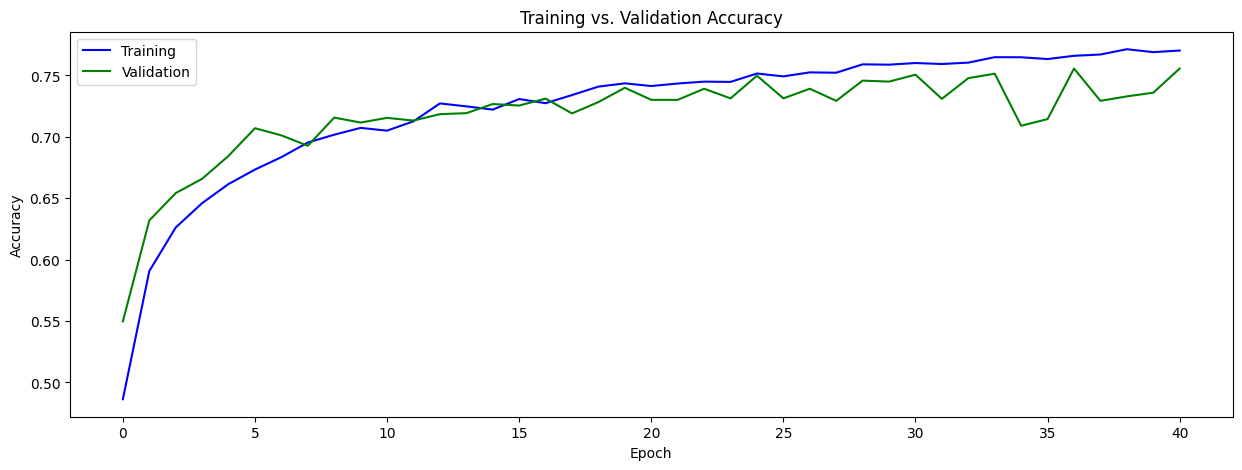

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 11ms/step


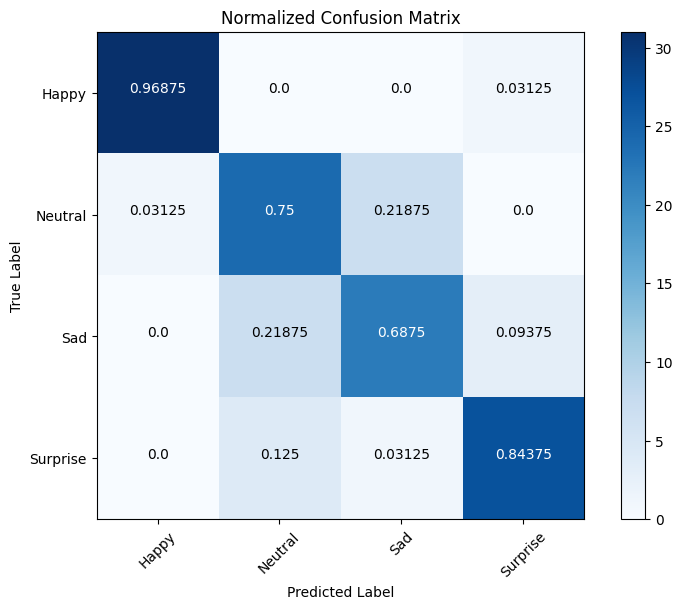

Precision:  0.8146913402457757
Recall:  0.8125
F1 Score:  0.8129970467363642


In [ ]:
# Plot the training and validation accuracy and loss at each epoch
plot_graph(history3_final)

# Load the best model weights
model3.load_weights('model_3_best_acc.weights.h5')

# Plot the confusion matrix, calculate the precision, recall and F1 Score
plot_confusion_matrix(model3, rescale=None, model_name='model3')

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

*   The model is adjusted to use preprocess_input provided by the base model. This simplified the run time, while also providing a model that is no longer overfitting or otherwise taking too much time to run.
* Training the model with the last three blocks unfrozen proved time-intensive, requiring over an hour per epoch on a CPU. Consequently, the model has been modified to train only the final block, starting from the 15th layer, to improve efficiency.
* The model achieved a training accuracy of 77% and a validation accuracy of 76%.
* With the changes made to the model the overall performance improved considerably, with an F1 score of 81% with a run on V100 and 83.5% F1 score when run on A100. I also have a hunch that rerunning on TPU can potentially produce different performance.
* The new method of doing an initial run, following by fine tune runs is producing the right results.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Clear the session and set a random seed
clear_session()

# Create the base model from the pre-trained model ResNet152V2
base_model = ResNet152V2(input_shape=IMG_SHAPE_RGB, include_top=False,
                         weights='imagenet')
base_model.trainable = False
base_model.summary()

# Setup for the initial run of the model
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(4)
data_augmentation = tf.keras.Sequential()

# Add the appropriate preprocessing layers
inputs = tf.keras.Input(shape=IMG_SHAPE_RGB)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model4 = tf.keras.Model(inputs, outputs)
model4.summary()

234545216/234545216 [==============================] - 2s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                     

*   Use Global Average Pooling (GAP) layer to reduce overfitting (by minimizing the number of parameters). This is especially useful for transfer learning.
*   GAP also makes the model more robust to spatial variations and efficient in handling different input sizes.

### **Compile and Train for an initial run**

In [ ]:
# Compile the model
base_learning_rate = 0.0001
model4.compile(loss=CategoricalCrossentropy(from_logits=True),
               optimizer=Adam(learning_rate=base_learning_rate),
               metrics=CategoricalAccuracy(name='accuracy'))

# Evaluate the model on the validation data
validation_data = load_val_data(rescale=None)
loss0, accuracy0 = model4.evaluate(validation_data)

# Train the model with an initial run of 10 epochs
initial_epochs = 10
history4 = model4.fit(load_train_data(rescale=None), epochs=initial_epochs,
                      validation_data=validation_data)

# Prepare the model for fine tuning
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 18
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Found 4977 images belonging to 4 classes.
156/156 [==============================] - 11s 52ms/step - loss: 2.9839 - accuracy: 0.2252
Found 15109 images belonging to 4 classes.
Epoch 1/10
473/473 [==============================] - 41s 69ms/step - loss: 2.1544 - accuracy: 0.2902 - val_loss: 1.5980 - val_accuracy: 0.3460
Epoch 2/10
473/473 [==============================] - 33s 69ms/step - loss: 1.7629 - accuracy: 0.3301 - val_loss: 1.4899 - val_accuracy: 0.3689
Epoch 3/10
473/473 [==============================] - 32s 68ms/step - loss: 1.6315 - accuracy: 0.3491 - val_loss: 1.3844 - val_accuracy: 0.3948
Epoch 4/10
473/473 [==============================] - 32s 67ms/step - loss: 1.5119 - accuracy: 0.3730 - val_loss: 1.3516 - val_accuracy: 0.4097
Epoch 5/10
473/473 [==============================] - 32s 67ms/step - loss: 1.4661 - accuracy: 0.3810 - val_loss: 1.3354 - val_accuracy: 0.4205
Epoch 6/10
473/473 [==============================] - 32s 67ms/step - loss: 1.4217 - accuracy: 0.3939 - 

### **Compile and Train for fine tuning**

In [ ]:
# Compile the model
model4.compile(
    loss=CategoricalCrossentropy(from_logits=True),
    optimizer=RMSprop(learning_rate=base_learning_rate / 10),
    metrics=CategoricalAccuracy(name="accuracy"),
)
model4.summary()

# Train the model with fine tuning
fine_tune_epochs = 40
total_epochs = initial_epochs + fine_tune_epochs
history4_final = model4.fit(
    load_train_data(rescale=None),
    epochs=total_epochs,
    initial_epoch=history4.epoch[-1],
    validation_data=validation_data,
    callbacks=create_callbacks(patience=8, model_name="model_4"),
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential (Sequential)     multiple                  0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 48, 48, 3)         0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 48, 48, 3)         0         
 da)                                                             
                                                                 
 resnet152v2 (Functional)    (None, 2, 2, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

### **Plot the confusion matrix for ResNet V2 (Model #4)**

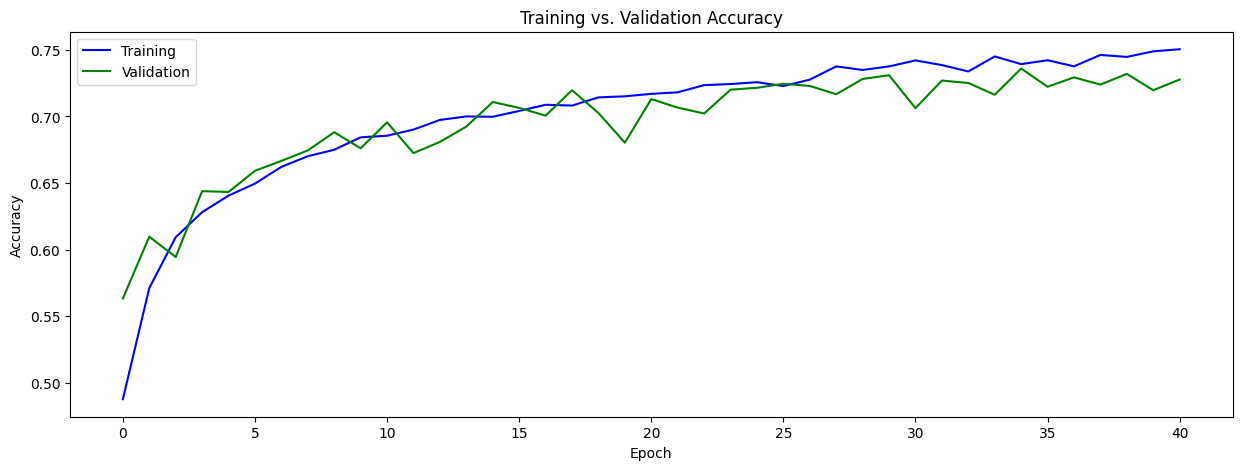

Found 128 images belonging to 4 classes.
4/4 [==============================] - 2s 22ms/step


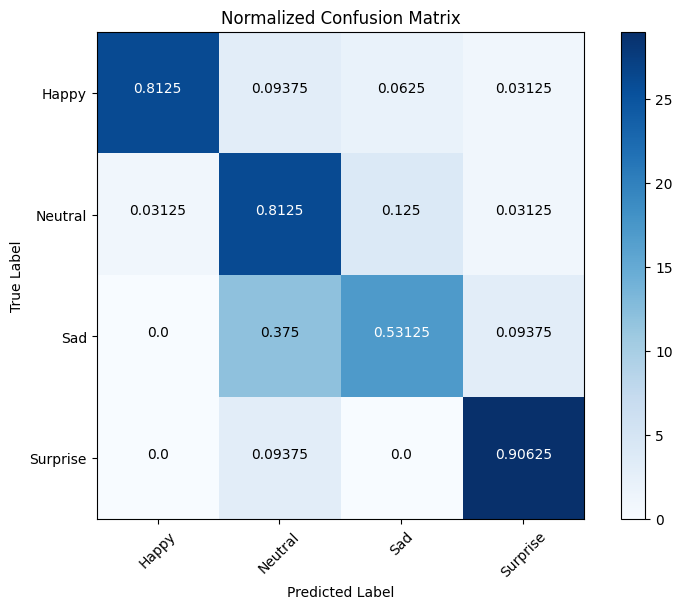

Precision:  0.7864859162813127
Recall:  0.765625
F1 Score:  0.7656340388722191


In [ ]:
# Plot the training and validation accuracy and loss at each epoch
plot_graph(history4_final)

# Load the best model weights
model4.load_weights('model_4_best_acc.weights.h5')

# Plot the confusion matrix, calculate the precision, recall and F1 Score
plot_confusion_matrix(model4, rescale=None, model_name='model4')

**Observations and Insights:__**

* Model is updated similar to VGG16.
* The model is performing well but it is behind VGG16.
* In summary, the performance of this model is unable to outperform VGG16.

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Clear the session and set a random seed
clear_session()

# Create the base model from the pre-trained model EfficientNetB0
base_model = EfficientNetB0(input_shape=IMG_SHAPE_RGB, include_top=False,
                            weights='imagenet')
base_model.trainable = False
base_model.summary()

# Setup for the initial run of the model
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(4)
data_augmentation = tf.keras.Sequential()

# Add the appropriate preprocessing layers
inputs = tf.keras.Input(shape=IMG_SHAPE_RGB)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model5 = tf.keras.Model(inputs, outputs)
model5.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

### **Compile and Train for an initial run**

In [ ]:
# Compile the model
base_learning_rate = 0.0001
model5.compile(
    loss=CategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=base_learning_rate),
    metrics=CategoricalAccuracy(name="accuracy"),
)

# Evaluate the model on the validation data
validation_data = load_val_data(rescale=None)
loss0, accuracy0 = model5.evaluate(validation_data)

# Train the model with an initial run of 10 epochs
initial_epochs = 10
history5 = model5.fit(
    load_train_data(rescale=None),
    epochs=initial_epochs,
    validation_data=validation_data,
)

# Prepare the model for fine tuning
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
set_trainable = False
for layer in base_model.layers:
    if layer.name == "block7a_project_conv":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Found 4977 images belonging to 4 classes.
156/156 [==============================] - 10s 48ms/step - loss: 1.4274 - accuracy: 0.3142
Found 15109 images belonging to 4 classes.
Epoch 1/10
473/473 [==============================] - 35s 62ms/step - loss: 1.3425 - accuracy: 0.3398 - val_loss: 1.2565 - val_accuracy: 0.4183
Epoch 2/10
473/473 [==============================] - 29s 62ms/step - loss: 1.2475 - accuracy: 0.4194 - val_loss: 1.2144 - val_accuracy: 0.4505
Epoch 3/10
473/473 [==============================] - 29s 62ms/step - loss: 1.2178 - accuracy: 0.4438 - val_loss: 1.1968 - val_accuracy: 0.4483
Epoch 4/10
473/473 [==============================] - 29s 61ms/step - loss: 1.2032 - accuracy: 0.4558 - val_loss: 1.1681 - val_accuracy: 0.4842
Epoch 5/10
473/473 [==============================] - 29s 61ms/step - loss: 1.1879 - accuracy: 0.4667 - val_loss: 1.1757 - val_accuracy: 0.4722
Epoch 6/10
473/473 [==============================] - 29s 61ms/step - loss: 1.1788 - accuracy: 0.4685 - 

### **Compile and Train for fine tuning**

In [ ]:
# Compile the model
model5.compile(
    loss=CategoricalCrossentropy(from_logits=True),
    optimizer=RMSprop(learning_rate=base_learning_rate / 10),
    metrics=CategoricalAccuracy(name="accuracy"),
)
model5.summary()

# Train the model with fine tuning
fine_tune_epochs = 40
total_epochs = initial_epochs + fine_tune_epochs
history5_final = model5.fit(
    load_train_data(rescale=None),
    epochs=total_epochs,
    initial_epoch=history5.epoch[-1],
    validation_data=validation_data,
    callbacks=create_callbacks(patience=8, model_name="model_5"),
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential (Sequential)     multiple                  0         
                                                                 
 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124  

### **Plot the confusion matrix for EfficientNet (Model #5)** ###

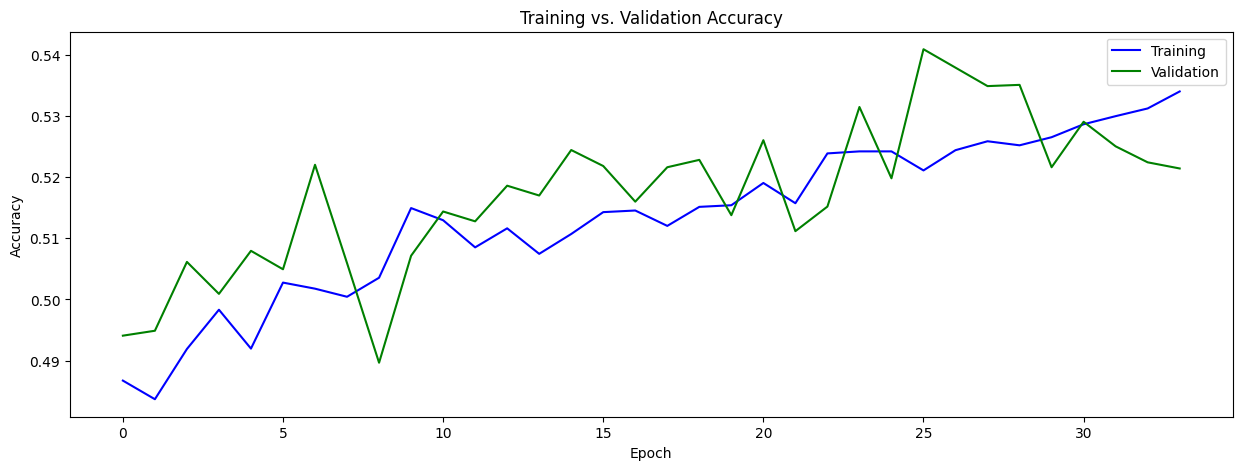

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 12ms/step


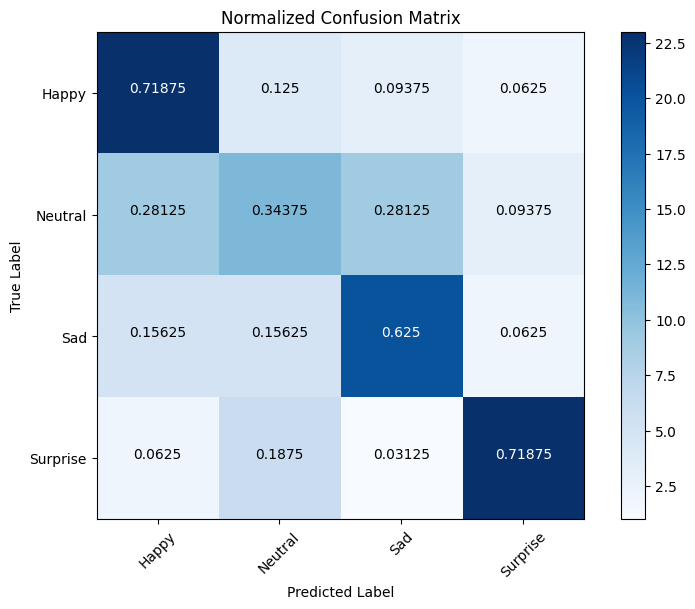

Precision:  0.5963869463869463
Recall:  0.6015625
F1 Score:  0.5961294420067078


In [ ]:
# Plot the training and validation accuracy and loss at each epoch
plot_graph(history5_final)

# Load the best model weights
model5.load_weights('model_5_best_acc.weights.h5')

# Plot the confusion matrix, calculate the precision, recall and F1 Score
plot_confusion_matrix(model5, rescale=None, model_name='model5')

**Observations and Insights:__**

* EfficientNet's performance improved compared to the previous implementation but still behind VGG16 and ResNet v2.
* Among the three transfer learning models we experimented with, EfficientNet exhibited the least promising results. There are some potential techniques to improve but given other viable candidates this is less of a priority at this time.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
# Create the data loaders for the training, validation and test data
train_data_gray = load_train_data(color_mode='grayscale')
val_data_gray = load_val_data(color_mode='grayscale')

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# Create a model with 5 convolution blocks
def create_model_6():
    # Create the model
    model = Sequential()

    # Add the first convolution block
    model.add(
        Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(48, 48, 1),
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the second convolution block
    model.add(Conv2D(128, kernel_size=(5, 5), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the third convolution block
    model.add(Conv2D(256, kernel_size=(5, 5), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the fourth convolution block
    model.add(Conv2D(512, kernel_size=(7, 7), activation="relu", padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Add the fifth convolution block
    model.add(Conv2D(1024, kernel_size=(9, 9), activation=LeakyReLU(), padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Flatten the output
    model.add(Flatten())

    # Add the dense layers
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.5))

    # Add the output layer
    model.add(Dense(4, activation="softmax"))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Print the model summary
    print(model.summary())
    return model

### **Compiling and Training the Model**

In [ ]:
# Clear the session
clear_session()

# Create and compile the model
model6 = create_model_6()

# Train the model
history = model6.fit(
    train_data_gray,
    epochs=50,
    batch_size=BATCH_SIZE,
    validation_data=val_data_gray,
    callbacks=create_callbacks(patience=8, model_name="model_6"),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

### **Evaluating the Model on Test Set**

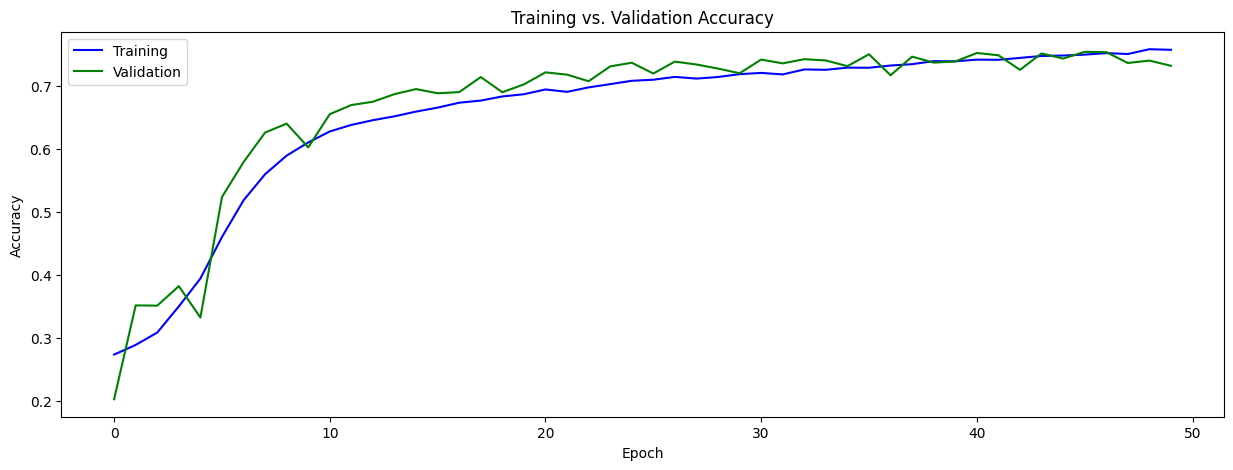

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 15ms/step - loss: 0.6013 - accuracy: 0.7891
Test Loss:  0.6012827754020691
Test Accuracy:  0.7890625


In [ ]:
# Plot the training and validation accuracy and loss at each epoch
plot_graph(history)

# Load the best model weights
model6.load_weights("model_6_best_acc.weights.h5")

# Print the test accuracy
print_test_accuracy(model6, 'grayscale')

### **Plotting the Confusion Matrix for Model #6**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 13ms/step


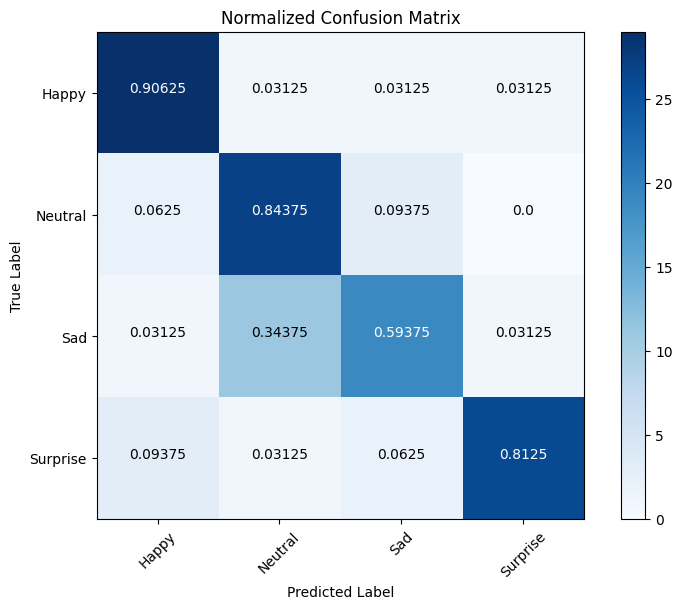

Precision:  0.7980357142857144
Recall:  0.7890625
F1 Score:  0.7872512437810945


In [ ]:
# Plot model performance on the test data
plot_confusion_matrix(model6, color_mode='grayscale', model_name='model6')

**Observations and Insights:__**

* This model previously outperformed other models including VGG16 which is now the recommended model.
* Given it's past performance it is a suitable candidate to improve further upon and to tune with the right hardware. It performed well on a TPU, so definitely worth rerunning in that configuration.

## **Conclusion:____________**

* See the recommendation now added for the final submission at the top of the document.

### **Insights**

### **Refined insights**: What are the most meaningful insights from the data relevant to the problem?

* 48x48 images can perform well, but most pre-built models have higher resolution images and often RGB.
* With today's camera equipment it would be better to use a model and the dataset that is higher resolution.
* RGB does not necessarily improve the performance of the model, grayscale can be sufficient and save compute resources.
* Surprised has very distinguishing features in the images, with more data the performance can be improved.
* Overall, it is great to see that transfer learning models with the right technique can perform well. On the flip side, there can be an approach taken where we run different models on different hardware architecture given that TPU appears to do well for CNN models that are handwritten (based on experience from the previous runs, but yet to be verified).

### **Comparison of various techniques and their relative performance**: How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* Performance of the transfer learning models on the 48x48 images has imrpoved but still feels a bit underwhelming. This is very likely due to the models being learned on much higher resolution than the data set for our project.
* If transfer learning is the goal (say, to reduce the model maintenance responsibility) then a more well-suited model for 48x48 should be found.
* As can be seen from the confusion matrix (see that section for additional commentary, and observations) the custom built models did quite nicely, and performed fast to potentially even run on low-compute scenario (say, on a phone) to serve more use cases.

### **Proposal for the final solution design**: What model do you propose to be adopted? Why is this the best solution to adopt?

* Check the updated notes at the top of the document.

In [ ]:
# Save the file as HTML.
!pip install nbconvert
!jupyter nbconvert --to html '/content/drive/My Drive/annam/adsp/facial-emotion/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/annam/adsp/facial-emotion/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb to html
[NbConvertApp] Writing 4363068 bytes to /content/drive/My Drive/annam/adsp/facial-emotion/Reference_Notebook_Facial_Emotion_Detection_Full_Code.html
